In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
import seaborn as sns
from scipy import stats
from scipy.stats import norm

get_ipython().magic(u'matplotlib inline')
import os
import sys
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style("darkgrid")
#sns.set(style="darkgrid")
from IPython.display import display 
import math
import warnings
from scipy.stats import chi2_contingency 

pd.set_option('chained_assignment',None)
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Iris1 data.csv')
df.head()

,ICN,BI_PROV_TIN,RND_PROV_TIN,PTNT_NM,PTNT_REL,PTNT_GND,PTNT_BTH_DT,PTNT_ST,PTNT_ZIP,EMP_SSN,...,PROC_4_CD,SRVC_CHRG_AMT_4,RMRK_CD_4,PROC_5_CD,SRVC_CHRG_AMT_5,RMRK_CD_5,BIL_NPI_ID,RNDR_NPI_ID,ORIG_MBR_ID_NBR,O/P
0,AA00052495,341650951,NaN,HANNAH,CH,M,1998-12-16,NC,27573,S230085641,...,A4230,NaN,W1,A4230,NaN,W1,1609858729,NaN,230085641,1
1,AA00049812,341650951,NaN,DITAS,RR,M,1956-01-14,NV,89011,S551476390,...,A6530,NaN,D1,A6530,NaN,D1,1609858729,NaN,551476390,0
2,AA00049832,341650951,NaN,DITAS,RR,M,1956-01-14,NV,89011,S551476390,...,A6530,NaN,D1,A6530,NaN,D1,1609858729,NaN,551476390,0
3,AA00049900,341650951,NaN,TAMMY,RR,M,1968-08-17,DE,19973,S571133658,...,A4215,NaN,D1,A4215,NaN,D1,1609858729,NaN,571133658,1
4,AA00049931,341650951,NaN,TAMMY,RR,M,1968-08-17,DE,19973,S571133658,...,A4215,NaN,D1,A4215,NaN,D1,1609858729,NaN,571133658,1


In [4]:
print('Number of Samples: ', len(df))

Number of Samples:  432


In [5]:
df.columns

Index(['ICN', 'BI_PROV_TIN', 'RND_PROV_TIN', 'PTNT_NM', 'PTNT_REL', 'PTNT_GND',
       'PTNT_BTH_DT', 'PTNT_ST', 'PTNT_ZIP', 'EMP_SSN', 'POL_GRP',
       'MBR_MKT_NBR', 'PROV_MPIN', 'KEY_PROV1_TIN_NBR', 'PROV_ST', 'PROV_ZIP',
       'TOT_IP_CHRG_AMT', 'BIL_SRVC_CNT', 'DIAG_1_CD', 'DIAG_2_CD',
       'DIAG_3_CD', 'DIAG_4_CD', 'DIAG_5_CD', 'PROC_1_CD', 'SRVC_CHRG_AMT_1',
       'RMRK_CD_1', 'PROC_2_CD', 'SRVC_CHRG_AMT_2', 'RMRK_CD_2', 'PROC_3_CD',
       'SRVC_CHRG_AMT_3', 'RMRK_CD_3', 'PROC_4_CD', 'SRVC_CHRG_AMT_4',
       'RMRK_CD_4', 'PROC_5_CD', 'SRVC_CHRG_AMT_5', 'RMRK_CD_5', 'BIL_NPI_ID',
       'RNDR_NPI_ID', 'ORIG_MBR_ID_NBR', 'O/P'],
      dtype='object')

In [6]:
# Data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 42 columns):
ICN                  432 non-null object
BI_PROV_TIN          432 non-null int64
RND_PROV_TIN         0 non-null float64
PTNT_NM              432 non-null object
PTNT_REL             432 non-null object
PTNT_GND             432 non-null object
PTNT_BTH_DT          432 non-null object
PTNT_ST              432 non-null object
PTNT_ZIP             432 non-null int64
EMP_SSN              432 non-null object
POL_GRP              432 non-null object
MBR_MKT_NBR          432 non-null int64
PROV_MPIN            432 non-null int64
KEY_PROV1_TIN_NBR    432 non-null int64
PROV_ST              432 non-null object
PROV_ZIP             432 non-null int64
TOT_IP_CHRG_AMT      432 non-null float64
BIL_SRVC_CNT         432 non-null int64
DIAG_1_CD            432 non-null object
DIAG_2_CD            432 non-null object
DIAG_3_CD            432 non-null object
DIAG_4_CD            420 non-null object


In [7]:
df = df.drop(['PTNT_NM','PTNT_GND','PTNT_BTH_DT','PTNT_ST','PTNT_ZIP'] ,axis = 1)

In [8]:
df = df.drop(['EMP_SSN','KEY_PROV1_TIN_NBR','PROV_ST','PROV_ZIP','TOT_IP_CHRG_AMT','BIL_SRVC_CNT'], axis = 1)

In [9]:
df = df.drop(['SRVC_CHRG_AMT_1','SRVC_CHRG_AMT_2','SRVC_CHRG_AMT_3'], axis = 1)

In [10]:
df = df.drop(['SRVC_CHRG_AMT_4','SRVC_CHRG_AMT_5','DIAG_4_CD','DIAG_5_CD'], axis = 1)

In [11]:
df = df.drop(['BI_PROV_TIN','RND_PROV_TIN','PTNT_REL','POL_GRP'], axis = 1)

In [12]:
df = df.drop(['MBR_MKT_NBR', 'PROV_MPIN','BIL_NPI_ID', 'RNDR_NPI_ID','ORIG_MBR_ID_NBR'], axis = 1)

In [13]:
df.shape

(432, 15)

In [14]:
df.head(36)

,ICN,DIAG_1_CD,DIAG_2_CD,DIAG_3_CD,PROC_1_CD,RMRK_CD_1,PROC_2_CD,RMRK_CD_2,PROC_3_CD,RMRK_CD_3,PROC_4_CD,RMRK_CD_4,PROC_5_CD,RMRK_CD_5,O/P
0,AA00052495,E109,E0050,E109,A4253,EE,A4225,W1,A4230,W1,A4230,W1,A4230,W1,1
1,AA00049812,S31105,E0051,Z933,A6530,D1,A6530,D1,A6530,D1,A6530,D1,A6530,D1,0
2,AA00049832,S31105,E0053,E109,A6530,D1,A6530,D1,A6530,D1,A6530,D1,A6530,D1,0
3,AA00049900,E109,E0059,G4733,A4215,NQ,A4253,NQ,A4259,D1,A4215,D1,A4215,D1,1
4,AA00049931,E109,E0060,E782,A4215,NQ,A4253,NQ,A4259,D1,A4215,D1,A4215,D1,1
5,AA00049949,E109,E0061,N183,A4259,NQ,A4259,NQ,A4259,55,A4259,EE,A4259,D1,1
6,AA00052098,Z933,E0062,E782,A4425,NQ,A4369,NQ,A4456,55,A4425,55,A4425,55,1
7,AA00052495,E109,E0063,E109,A4253,W1,A4225,W1,A4230,EE,A4253,EE,A4253,EE,1
8,AA00052862,G4733,E0121,Z933,99214,D1,99214,D1,99214,D1,99214,D1,99214,D1,0
9,AA00053504,Z933,E0132,E782,A4409,EE,A4419,00,A4394,00,A4409,00,A4409,00,1


In [15]:
df.columns

Index(['ICN', 'DIAG_1_CD', 'DIAG_2_CD', 'DIAG_3_CD', 'PROC_1_CD', 'RMRK_CD_1',
       'PROC_2_CD', 'RMRK_CD_2', 'PROC_3_CD', 'RMRK_CD_3', 'PROC_4_CD',
       'RMRK_CD_4', 'PROC_5_CD', 'RMRK_CD_5', 'O/P'],
      dtype='object')

In [16]:
df.head(36)

,ICN,DIAG_1_CD,DIAG_2_CD,DIAG_3_CD,PROC_1_CD,RMRK_CD_1,PROC_2_CD,RMRK_CD_2,PROC_3_CD,RMRK_CD_3,PROC_4_CD,RMRK_CD_4,PROC_5_CD,RMRK_CD_5,O/P
0,AA00052495,E109,E0050,E109,A4253,EE,A4225,W1,A4230,W1,A4230,W1,A4230,W1,1
1,AA00049812,S31105,E0051,Z933,A6530,D1,A6530,D1,A6530,D1,A6530,D1,A6530,D1,0
2,AA00049832,S31105,E0053,E109,A6530,D1,A6530,D1,A6530,D1,A6530,D1,A6530,D1,0
3,AA00049900,E109,E0059,G4733,A4215,NQ,A4253,NQ,A4259,D1,A4215,D1,A4215,D1,1
4,AA00049931,E109,E0060,E782,A4215,NQ,A4253,NQ,A4259,D1,A4215,D1,A4215,D1,1
5,AA00049949,E109,E0061,N183,A4259,NQ,A4259,NQ,A4259,55,A4259,EE,A4259,D1,1
6,AA00052098,Z933,E0062,E782,A4425,NQ,A4369,NQ,A4456,55,A4425,55,A4425,55,1
7,AA00052495,E109,E0063,E109,A4253,W1,A4225,W1,A4230,EE,A4253,EE,A4253,EE,1
8,AA00052862,G4733,E0121,Z933,99214,D1,99214,D1,99214,D1,99214,D1,99214,D1,0
9,AA00053504,Z933,E0132,E782,A4409,EE,A4419,00,A4394,00,A4409,00,A4409,00,1


In [17]:
# The dataset contains 700-900 unique ICD codes for three diagnoses (primary, secondary and additional) for each patient. 
# As these many categories would not make any meaningful contribution to the model, we decided to collapse the diagnosis codes
# into 9 disease categories.

In [18]:
# Creating additional columns for diagnosis
df['level1_diag1'] = df['DIAG_1_CD']
df['level1_diag2'] = df['DIAG_2_CD']
df['level1_diag3'] = df['DIAG_3_CD']

In [19]:
df.loc[df['DIAG_1_CD'].str.contains('I'), ['level1_diag1']] = 0
df.loc[df['DIAG_1_CD'].str.contains('E'), ['level1_diag1']] = 1
df.loc[df['DIAG_1_CD'].str.contains('Z'), ['level1_diag1']] = 2
df.loc[df['DIAG_1_CD'].str.contains('S'), ['level1_diag1']] = 3
df.loc[df['DIAG_1_CD'].str.contains('G'), ['level1_diag1']] = 4
df.loc[df['DIAG_1_CD'].str.contains('R'), ['level1_diag1']] = 5
df.loc[df['DIAG_1_CD'].str.contains('C'), ['level1_diag1']] = 6
df.loc[df['DIAG_1_CD'].str.contains('M'), ['level1_diag1']] = 7
df.loc[df['DIAG_1_CD'].str.contains('N'), ['level1_diag1']] = 8
df.loc[df['DIAG_1_CD'].str.contains('K'), ['level1_diag1']] = 9

df.loc[df['DIAG_2_CD'].str.contains('I'), ['level1_diag2']] = 0
df.loc[df['DIAG_2_CD'].str.contains('E'), ['level1_diag2']] = 1
df.loc[df['DIAG_2_CD'].str.contains('Z'), ['level1_diag2']] = 2
df.loc[df['DIAG_2_CD'].str.contains('S'), ['level1_diag2']] = 3
df.loc[df['DIAG_2_CD'].str.contains('G'), ['level1_diag2']] = 4
df.loc[df['DIAG_2_CD'].str.contains('R'), ['level1_diag2']] = 5
df.loc[df['DIAG_2_CD'].str.contains('C'), ['level1_diag2']] = 6
df.loc[df['DIAG_2_CD'].str.contains('M'), ['level1_diag2']] = 7
df.loc[df['DIAG_2_CD'].str.contains('N'), ['level1_diag2']] = 8
df.loc[df['DIAG_2_CD'].str.contains('K'), ['level1_diag2']] = 9

df.loc[df['DIAG_3_CD'].str.contains('I'), ['level1_diag3']] = 0
df.loc[df['DIAG_3_CD'].str.contains('E'), ['level1_diag3']] = 1
df.loc[df['DIAG_3_CD'].str.contains('Z'), ['level1_diag3']] = 2
df.loc[df['DIAG_3_CD'].str.contains('S'), ['level1_diag3']] = 3
df.loc[df['DIAG_3_CD'].str.contains('G'), ['level1_diag3']] = 4
df.loc[df['DIAG_3_CD'].str.contains('R'), ['level1_diag3']] = 5
df.loc[df['DIAG_3_CD'].str.contains('C'), ['level1_diag3']] = 6
df.loc[df['DIAG_3_CD'].str.contains('M'), ['level1_diag3']] = 7
df.loc[df['DIAG_3_CD'].str.contains('N'), ['level1_diag3']] = 8
df.loc[df['DIAG_3_CD'].str.contains('K'), ['level1_diag3']] = 9

In [20]:
df.dtypes

ICN             object
DIAG_1_CD       object
DIAG_2_CD       object
DIAG_3_CD       object
PROC_1_CD       object
RMRK_CD_1       object
PROC_2_CD       object
RMRK_CD_2       object
PROC_3_CD       object
RMRK_CD_3       object
PROC_4_CD       object
RMRK_CD_4       object
PROC_5_CD       object
RMRK_CD_5       object
O/P              int64
level1_diag1    object
level1_diag2    object
level1_diag3    object
dtype: object

In [21]:
df['level1_diag1'] = df['level1_diag1'].astype(float)
df['level1_diag2'] = df['level1_diag2'].astype(float)
df['level1_diag3'] = df['level1_diag3'].astype(float)

In [22]:
df[['DIAG_1_CD','level1_diag1']].head(15).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
DIAG_1_CD,E109,S31105,S31105,E109,E109,E109,Z933,E109,G4733,Z933,R030,E782,R9720,Z0000,C9111
level1_diag1,1,3,3,1,1,1,2,1,4,2,5,1,5,2,6


In [23]:
df[['DIAG_2_CD','level1_diag2']].head(15).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
DIAG_2_CD,E0050,E0051,E0053,E0059,E0060,E0061,E0062,E0063,E0121,E0132,I150,R5383,E781,G4733,Z933
level1_diag2,1,1,1,1,1,1,1,1,1,1,0,5,1,4,2


In [24]:
df[['DIAG_3_CD','level1_diag3']].head(15).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
DIAG_3_CD,E109,Z933,E109,G4733,E782,N183,E782,E109,Z933,E782,I10,S31105,E109,E109,E109
level1_diag3,1,2,1,4,1,8,1,1,2,1,0,3,1,1,1


In [25]:
df = df.drop(['DIAG_1_CD','DIAG_2_CD','DIAG_3_CD'], axis = 1)

In [26]:
# Creating additional columns for Procedure Codes
df['PROC_1'] = df['PROC_1_CD']
df['PROC_2'] = df['PROC_2_CD']
df['PROC_3'] = df['PROC_3_CD']
df['PROC_4'] = df['PROC_4_CD']
df['PROC_5'] = df['PROC_5_CD']

In [27]:
df.loc[df['PROC_1_CD'].str.contains('A'), ['PROC_1']] = 0
df.loc[df['PROC_2_CD'].str.contains('A'), ['PROC_2']] = 0
df.loc[df['PROC_3_CD'].str.contains('A'), ['PROC_3']] = 0
df.loc[df['PROC_4_CD'].str.contains('A'), ['PROC_4']] = 0
df.loc[df['PROC_5_CD'].str.contains('A'), ['PROC_5']] = 0

In [28]:
df['PROC_1'] = df['PROC_1'].astype(float)
df['PROC_2'] = df['PROC_2'].astype(float)
df['PROC_3'] = df['PROC_3'].astype(float)
df['PROC_4'] = df['PROC_4'].astype(float)
df['PROC_5'] = df['PROC_5'].astype(float)

In [29]:
for index, row in df.iterrows():
    if (row['PROC_1'] >= 100 and row['PROC_1'] < 2000):
        df.loc[index, 'PROC_1'] = 1
    elif (row['PROC_1'] >= 10021 and row['PROC_1'] < 69991):
        df.loc[index, 'PROC_1'] = 2
    elif (row['PROC_1'] >= 70010 and row['PROC_1'] < 80000):
        df.loc[index, 'PROC_1'] = 3
    elif (row['PROC_1'] >= 80047 and row['PROC_1'] < 89399):
        df.loc[index, 'PROC_1'] = 4
    elif (row['PROC_1'] >= 90281 and row['PROC_1'] < 99607):
        df.loc[index, 'PROC_1'] = 5
    elif (row['PROC_1'] >= 99201 and row['PROC_1'] < 99500):
        df.loc[index, 'PROC_1'] = 6
    else:
        df.loc[index, 'PROC_1'] = 10
        
    if (row['PROC_2'] >= 100 and row['PROC_2'] < 2000):
        df.loc[index, 'PROC_2'] = 1
    elif (row['PROC_2'] >= 10021 and row['PROC_2'] < 69991):
        df.loc[index, 'PROC_2'] = 2
    elif (row['PROC_2'] >= 70010 and row['PROC_2'] < 80000):
        df.loc[index, 'PROC_2'] = 3
    elif (row['PROC_2'] >= 80047 and row['PROC_2'] < 89399):
        df.loc[index, 'PROC_2'] = 4
    elif (row['PROC_2'] >= 90281 and row['PROC_2'] < 99607):
        df.loc[index, 'PROC_2'] = 5
    elif (row['PROC_2'] >= 99201 and row['PROC_2'] < 99500):
        df.loc[index, 'PROC_2'] = 6
    else:
        df.loc[index, 'PROC_2'] = 10
        
    if (row['PROC_3'] >= 100 and row['PROC_3'] < 2000):
        df.loc[index, 'PROC_3'] = 1
    elif (row['PROC_3'] >= 10021 and row['PROC_3'] < 69991):
        df.loc[index, 'PROC_3'] = 2
    elif (row['PROC_3'] >= 70010 and row['PROC_3'] < 80000):
        df.loc[index, 'PROC_3'] = 3
    elif (row['PROC_3'] >= 80047 and row['PROC_3'] < 89399):
        df.loc[index, 'PROC_3'] = 4
    elif (row['PROC_3'] >= 90281 and row['PROC_3'] < 99607):
        df.loc[index, 'PROC_3'] = 5
    elif (row['PROC_3'] >= 99201 and row['PROC_3'] < 99500):
        df.loc[index, 'PROC_3'] = 6
    else:
        df.loc[index, 'PROC_3'] = 10    
        
    if (row['PROC_4'] >= 100 and row['PROC_4'] < 2000):
        df.loc[index, 'PROC_4'] = 1
    elif (row['PROC_4'] >= 10021 and row['PROC_4'] < 69991):
        df.loc[index, 'PROC_4'] = 2
    elif (row['PROC_4'] >= 70010 and row['PROC_4'] < 80000):
        df.loc[index, 'PROC_4'] = 3
    elif (row['PROC_1'] >= 80047 and row['PROC_4'] < 89399):
        df.loc[index, 'PROC_4'] = 4
    elif (row['PROC_1'] >= 90281 and row['PROC_4'] < 99607):
        df.loc[index, 'PROC_4'] = 5
    elif (row['PROC_1'] >= 99201 and row['PROC_4'] < 99500):
        df.loc[index, 'PROC_4'] = 6
    else:
        df.loc[index, 'PROC_4'] = 10
        
    if (row['PROC_5'] >= 100 and row['PROC_5'] < 2000):
        df.loc[index, 'PROC_5'] = 1
    elif (row['PROC_5'] >= 10021 and row['PROC_5'] < 69991):
        df.loc[index, 'PROC_5'] = 2
    elif (row['PROC_5'] >= 70010 and row['PROC_5'] < 80000):
        df.loc[index, 'PROC_5'] = 3
    elif (row['PROC_5'] >= 80047 and row['PROC_5'] < 89399):
        df.loc[index, 'PROC_5'] = 4
    elif (row['PROC_5'] >= 90281 and row['PROC_5'] < 99607):
        df.loc[index, 'PROC_5'] = 5
    elif (row['PROC_5'] >= 99201 and row['PROC_5'] < 99500):
        df.loc[index, 'PROC_5'] = 6
    else:
        df.loc[index, 'PROC_5'] = 10

In [30]:
df = df.drop(['PROC_1_CD','PROC_2_CD','PROC_3_CD','PROC_4_CD','PROC_5_CD'], axis = 1)

In [31]:
# Creating additional columns for Remark code
df['RMRK_1_CD'] = df['RMRK_CD_1']
df['RMRK_2_CD'] = df['RMRK_CD_2']
df['RMRK_3_CD'] = df['RMRK_CD_3']
df['RMRK_4_CD'] = df['RMRK_CD_4']
df['RMRK_5_CD'] = df['RMRK_CD_5']

In [32]:
df.loc[df['RMRK_1_CD'].str.contains('D'), ['RMRK_CD_1']] = 0
df.loc[df['RMRK_2_CD'].str.contains('D'), ['RMRK_CD_2']] = 0
df.loc[df['RMRK_3_CD'].str.contains('D'), ['RMRK_CD_3']] = 0
df.loc[df['RMRK_4_CD'].str.contains('D'), ['RMRK_CD_4']] = 0
df.loc[df['RMRK_5_CD'].str.contains('D'), ['RMRK_CD_5']] = 0

In [33]:
df.loc[df['RMRK_1_CD'].str.contains('E'), ['RMRK_CD_1']] = 1
df.loc[df['RMRK_1_CD'].str.contains('N'), ['RMRK_CD_1']] = 1
df.loc[df['RMRK_1_CD'].str.contains('W'), ['RMRK_CD_1']] = 1
df.loc[df['RMRK_1_CD'].str.contains('I'), ['RMRK_CD_1']] = 1
df.loc[df['RMRK_1_CD'].str.contains('0'), ['RMRK_CD_1']] = 1
df.loc[df['RMRK_1_CD'].str.contains('5'), ['RMRK_CD_1']] = 1
df.loc[df['RMRK_1_CD'].str.contains('U'), ['RMRK_CD_1']] = 1

df.loc[df['RMRK_2_CD'].str.contains('E'), ['RMRK_CD_2']] = 1
df.loc[df['RMRK_2_CD'].str.contains('N'), ['RMRK_CD_2']] = 1
df.loc[df['RMRK_2_CD'].str.contains('W'), ['RMRK_CD_2']] = 1
df.loc[df['RMRK_2_CD'].str.contains('I'), ['RMRK_CD_2']] = 1
df.loc[df['RMRK_2_CD'].str.contains('5'), ['RMRK_CD_1']] = 1
df.loc[df['RMRK_2_CD'].str.contains('0'), ['RMRK_CD_2']] = 1
df.loc[df['RMRK_2_CD'].str.contains('U'), ['RMRK_CD_2']] = 1

df.loc[df['RMRK_3_CD'].str.contains('E'), ['RMRK_CD_3']] = 1
df.loc[df['RMRK_3_CD'].str.contains('N'), ['RMRK_CD_3']] = 1
df.loc[df['RMRK_3_CD'].str.contains('W'), ['RMRK_CD_3']] = 1
df.loc[df['RMRK_3_CD'].str.contains('I'), ['RMRK_CD_3']] = 1
df.loc[df['RMRK_3_CD'].str.contains('0'), ['RMRK_CD_3']] = 1
df.loc[df['RMRK_3_CD'].str.contains('U'), ['RMRK_CD_3']] = 1
df.loc[df['RMRK_3_CD'].str.contains('5'), ['RMRK_CD_3']] = 1

df.loc[df['RMRK_4_CD'].str.contains('E'), ['RMRK_CD_4']] = 1
df.loc[df['RMRK_4_CD'].str.contains('N'), ['RMRK_CD_4']] = 1
df.loc[df['RMRK_4_CD'].str.contains('W'), ['RMRK_CD_4']] = 1
df.loc[df['RMRK_4_CD'].str.contains('I'), ['RMRK_CD_4']] = 1
df.loc[df['RMRK_4_CD'].str.contains('0'), ['RMRK_CD_4']] = 1
df.loc[df['RMRK_4_CD'].str.contains('U'), ['RMRK_CD_4']] = 1
df.loc[df['RMRK_4_CD'].str.contains('5'), ['RMRK_CD_4']] = 1

df.loc[df['RMRK_5_CD'].str.contains('E'), ['RMRK_CD_5']] = 1
df.loc[df['RMRK_5_CD'].str.contains('N'), ['RMRK_CD_5']] = 1
df.loc[df['RMRK_5_CD'].str.contains('W'), ['RMRK_CD_5']] = 1
df.loc[df['RMRK_5_CD'].str.contains('I'), ['RMRK_CD_5']] = 1
df.loc[df['RMRK_5_CD'].str.contains('0'), ['RMRK_CD_5']] = 1
df.loc[df['RMRK_5_CD'].str.contains('U'), ['RMRK_CD_5']] = 1
df.loc[df['RMRK_5_CD'].str.contains('5'), ['RMRK_CD_5']] = 1

In [34]:
df.head(36)

,ICN,RMRK_CD_1,RMRK_CD_2,RMRK_CD_3,RMRK_CD_4,RMRK_CD_5,O/P,level1_diag1,level1_diag2,level1_diag3,PROC_1,PROC_2,PROC_3,PROC_4,PROC_5,RMRK_1_CD,RMRK_2_CD,RMRK_3_CD,RMRK_4_CD,RMRK_5_CD
0,AA00052495,1,1,1,1,1,1,1.0,1.0,1.0,10.0,10.0,10.0,10.0,10.0,EE,W1,W1,W1,W1
1,AA00049812,0,0,0,0,0,0,3.0,1.0,2.0,10.0,10.0,10.0,10.0,10.0,D1,D1,D1,D1,D1
2,AA00049832,0,0,0,0,0,0,3.0,1.0,1.0,10.0,10.0,10.0,10.0,10.0,D1,D1,D1,D1,D1
3,AA00049900,1,1,0,0,0,1,1.0,1.0,4.0,10.0,10.0,10.0,10.0,10.0,NQ,NQ,D1,D1,D1
4,AA00049931,1,1,0,0,0,1,1.0,1.0,1.0,10.0,10.0,10.0,10.0,10.0,NQ,NQ,D1,D1,D1
5,AA00049949,1,1,1,1,0,1,1.0,1.0,8.0,10.0,10.0,10.0,10.0,10.0,NQ,NQ,55,EE,D1
6,AA00052098,1,1,1,1,1,1,2.0,1.0,1.0,10.0,10.0,10.0,10.0,10.0,NQ,NQ,55,55,55
7,AA00052495,1,1,1,1,1,1,1.0,1.0,1.0,10.0,10.0,10.0,10.0,10.0,W1,W1,EE,EE,EE
8,AA00052862,0,0,0,0,0,0,4.0,1.0,2.0,5.0,5.0,5.0,5.0,5.0,D1,D1,D1,D1,D1
9,AA00053504,1,1,1,1,1,1,2.0,1.0,1.0,10.0,10.0,10.0,10.0,10.0,EE,00,00,00,00


In [35]:
df = df.drop(['RMRK_1_CD','RMRK_2_CD','RMRK_3_CD','RMRK_4_CD','RMRK_5_CD'], axis = 1)

In [36]:
df.shape

(432, 15)

In [37]:
df['RMRK_CD_1'] = df['RMRK_CD_1'].astype(float)
df['RMRK_CD_2'] = df['RMRK_CD_2'].astype(float)
df['RMRK_CD_3'] = df['RMRK_CD_3'].astype(float)
df['RMRK_CD_4'] = df['RMRK_CD_4'].astype(float)
df['RMRK_CD_5'] = df['RMRK_CD_5'].astype(float)

In [38]:
df = df.drop(['ICN'], axis = 1)

In [39]:
df.dtypes

RMRK_CD_1       float64
RMRK_CD_2       float64
RMRK_CD_3       float64
RMRK_CD_4       float64
RMRK_CD_5       float64
O/P               int64
level1_diag1    float64
level1_diag2    float64
level1_diag3    float64
PROC_1          float64
PROC_2          float64
PROC_3          float64
PROC_4          float64
PROC_5          float64
dtype: object

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn import metrics
import matplotlib.pyplot as plt 

In [41]:
df.columns

Index(['RMRK_CD_1', 'RMRK_CD_2', 'RMRK_CD_3', 'RMRK_CD_4', 'RMRK_CD_5', 'O/P',
       'level1_diag1', 'level1_diag2', 'level1_diag3', 'PROC_1', 'PROC_2',
       'PROC_3', 'PROC_4', 'PROC_5'],
      dtype='object')

In [42]:
feature_set = ['RMRK_CD_1','RMRK_CD_2','RMRK_CD_3','RMRK_CD_4','RMRK_CD_5',
               'level1_diag1','level1_diag2','level1_diag3',
               'PROC_1','PROC_2','PROC_3','PROC_4','PROC_5']

In [43]:
train_input = df[feature_set]
train_output = df['O/P']

In [44]:
train_output.head()

0    1
1    0
2    0
3    1
4    1
Name: O/P, dtype: int64

In [45]:
df['O/P'].head()

0    1
1    0
2    0
3    1
4    1
Name: O/P, dtype: int64

In [46]:
df['O/P'].value_counts()

0    240
1    192
Name: O/P, dtype: int64

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
train_set, test_set, train_labels, test_labels = train_test_split(train_input, train_output, test_size=0.20, random_state=15)

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
Rf_model = RandomForestClassifier(n_estimators=50,criterion='entropy',max_depth=3 )

In [51]:
Rf_model.fit(train_set, train_labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [52]:
y_train_rf = Rf_model.predict(train_set)

In [53]:
y_predict_Rf = Rf_model.predict(test_set)

In [54]:
Rf_acc = metrics.accuracy_score(train_labels, y_train_rf)
print(Rf_acc)

0.973913043478


In [55]:
Rf_acc = metrics.accuracy_score(test_labels, y_predict_Rf)
print(Rf_acc)

0.965517241379


In [56]:
Rf_cr = metrics.classification_report(test_labels , y_predict_Rf)
print(Rf_cr)

             precision    recall  f1-score   support

          0       0.94      1.00      0.97        47
          1       1.00      0.93      0.96        40

avg / total       0.97      0.97      0.97        87



In [57]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

conf_mat = confusion_matrix(y_true = train_labels, y_pred = y_train_rf)
print('Confusion matrix:\n', conf_mat)

Confusion matrix:
 [[193   0]
 [  9 143]]


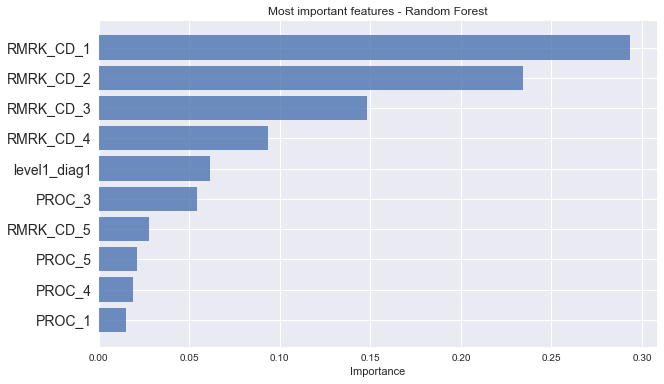

In [58]:
feature_names = train_set.columns
feature_imports = Rf_model.feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(10, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)
plt.figure(figsize=(10,6))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('Most important features - Random Forest')
plt.show()

In [59]:
n_estimators = 50
forest = RandomForestClassifier(warm_start=True,oob_score=True)

for i in range(1, n_estimators +  1):
    forest.set_params(n_estimators = i)
    forest.fit(train_set,train_labels)
    oob_error = 1 - forest.oob_score_
    print (i, forest.oob_score_)


1 0.692753623188
2 0.791304347826
3 0.872463768116
4 0.91884057971
5 0.947826086957
6 0.96231884058
7 0.979710144928
8 0.988405797101
9 0.991304347826
10 0.991304347826
11 0.994202898551
12 0.994202898551
13 0.994202898551
14 0.994202898551
15 0.997101449275
16 1.0
17 1.0
18 1.0
19 1.0
20 1.0
21 1.0
22 1.0
23 1.0
24 1.0
25 1.0
26 1.0
27 1.0
28 1.0
29 1.0
30 1.0
31 1.0
32 1.0
33 1.0
34 1.0
35 1.0
36 1.0
37 1.0
38 1.0
39 1.0
40 1.0
41 1.0
42 1.0
43 1.0
44 1.0
45 1.0
46 1.0
47 1.0
48 1.0
49 1.0
50 1.0


In [60]:
import matplotlib.pyplot as plt

from collections import OrderedDict
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

In [61]:
n_estimators = 100
forest = RandomForestClassifier(warm_start=True,oob_score=True)

for i in range(1, n_estimators +  1):
    forest.set_params(n_estimators = i)
    forest.fit(train_set,train_labels)
    oob_error = 1 - forest.oob_score_
    print (i, forest.oob_score_)

1 0.730434782609
2 0.823188405797
3 0.878260869565
4 0.915942028986
5 0.96231884058
6 0.982608695652
7 0.997101449275
8 0.997101449275
9 0.997101449275
10 1.0
11 1.0
12 1.0
13 1.0
14 1.0
15 1.0
16 1.0
17 1.0
18 1.0
19 1.0
20 1.0
21 1.0
22 1.0
23 1.0
24 1.0
25 1.0
26 1.0
27 1.0
28 1.0
29 1.0
30 1.0
31 1.0
32 1.0
33 1.0
34 1.0
35 1.0
36 1.0
37 1.0
38 1.0
39 1.0
40 1.0
41 1.0
42 1.0
43 1.0
44 1.0
45 1.0
46 1.0
47 1.0
48 1.0
49 1.0
50 1.0
51 1.0
52 1.0
53 1.0
54 1.0
55 1.0
56 1.0
57 1.0
58 1.0
59 1.0
60 1.0
61 1.0
62 1.0
63 1.0
64 1.0
65 1.0
66 1.0
67 1.0
68 1.0
69 1.0
70 1.0
71 1.0
72 1.0
73 1.0
74 1.0
75 1.0
76 1.0
77 1.0
78 1.0
79 1.0
80 1.0
81 1.0
82 1.0
83 1.0
84 1.0
85 1.0
86 1.0
87 1.0
88 1.0
89 1.0
90 1.0
91 1.0
92 1.0
93 1.0
94 1.0
95 1.0
96 1.0
97 1.0
98 1.0
99 1.0
100 1.0


In [62]:
print(__doc__)

RANDOM_STATE = 123

X, y = make_classification(n_samples=500, n_features=25,
                           n_clusters_per_class=1, n_informative=15,
                           random_state=RANDOM_STATE)
ensemble_clfs = [
    ("RandomForestClassifier, max_features='sqrt'",
        RandomForestClassifier(n_estimators=100,
                               warm_start=True, oob_score=True,
                               max_features="sqrt",
                               random_state=RANDOM_STATE))
]

Automatically created module for IPython interactive environment


In [63]:
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)
min_estimators = 15
max_estimators = 175

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(X, y)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

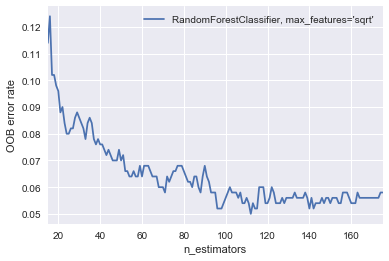

In [64]:
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

In [65]:
from sklearn import svm

In [66]:
clf = svm.SVC(C=10) 

In [67]:
clf.fit(train_set, train_labels)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [68]:
y_train_clf = clf.predict(train_set)

In [69]:
y_predict_clf = clf.predict(test_set)

In [70]:
clf_acc = metrics.accuracy_score(train_labels, y_train_clf)
print(clf_acc)

1.0


In [71]:
clf_acc = metrics.accuracy_score(test_labels, y_predict_clf)
print(Rf_acc)

0.965517241379


In [72]:
conf_mat = confusion_matrix(y_true = train_labels, y_pred = y_train_clf)
print('Confusion matrix:\n', conf_mat)

Confusion matrix:
 [[193   0]
 [  0 152]]
